
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 500.  Construct portfolios from the 500 stocks in the S&P 500 large cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp500-galaxy']
risk_free_rate = 0
annual_returns = '1 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M Company,US Stocks:Industrials,169.46,21.25,8.83,-7.43,5.26,20.91,10.25,23.07,8.83,0.38
1,ABT,Abbott Laboratories,US Stocks:Healthcare,-32.77,16.70,28.58,27.52,21.94,23.21,17.90,19.28,28.58,1.48
2,ABBV,AbbVie Inc.,US Stocks:Healthcare,358.19,96.28,30.56,9.82,19.33,20.10,4.76,32.32,30.56,0.95
3,ABMD,ABIOMED Inc,US Stocks:Healthcare,31.62,-4.67,44.18,12.87,28.11,25.81,14.97,48.97,44.18,0.90
4,ACN,Accenture plc,US Stocks:Technology,257.37,34.94,28.85,21.73,21.13,17.80,8.90,22.71,28.85,1.27
5,ATVI,Activision Blizzard,US Stocks:Communication Services,25.38,9.81,48.05,12.07,17.34,25.99,16.49,30.32,48.05,1.58
6,ADBE,Adobe Inc.,US Stocks:Technology,-2.99,-4.74,60.38,42.36,40.14,30.16,21.37,23.74,60.38,2.54
7,AMD,Advanced Micro Devices Inc,US Stocks:Technology,469.46,72.90,137.35,110.86,111.35,42.75,23.35,59.05,137.35,2.33
8,AAP,Advance Auto Parts,US Stocks:Consumer Discretionary,-21.22,-2.66,0.95,14.04,0.00,24.85,13.48,36.19,0.95,0.03
9,AES,AES Corp,US Stocks:Utilities,93.76,113.00,15.87,29.59,22.03,31.48,18.49,26.62,15.87,0.60


In [6]:
# Rank
#rank = bb.rank(df, rank_by='Sharpe Ratio')
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=2)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
326,NEE,NextEra Energy,US Stocks:Utilities,-7.27,21.98,28.34,26.63,29.10,18.39,10.42,16.13,28.34,1.76
33,AWK,American Water Works Company Inc,US Stocks:Utilities,-37.65,18.61,22.57,19.86,23.31,23.91,16.92,17.61,22.57,1.28
337,NVDA,Nvidia Corporation,US Stocks:Technology,-18.42,33.27,160.24,43.09,76.42,41.58,30.35,43.78,160.24,3.66
350,PYPL,PayPal,US Stocks:Technology,293.16,66.05,108.21,45.31,44.78,45.32,30.88,30.60,108.21,3.54
128,CCI,Crown Castle International Corp.,US Stocks:Real Estate,10.62,10.76,24.96,18.34,18.35,23.29,12.74,15.91,24.96,1.57
168,EQIX,Equinix,US Stocks:Real Estate,-65.78,-20.24,28.40,19.27,21.61,36.58,25.61,20.82,28.40,1.36
15,ALB,Albemarle Corp,US Stocks:Materials,11883.49,374.12,122.97,4.23,23.38,41.73,11.40,45.75,122.97,2.69
199,FCX,Freeport-McMoRan Inc.,US Stocks:Materials,5202.77,498.79,122.00,21.83,27.48,28.95,7.18,51.37,122.00,2.37
185,FDX,FedEx Corporation,US Stocks:Industrials,199.76,189.22,94.82,8.72,15.26,29.77,19.81,35.72,94.82,2.65
389,ROL,Rollins Inc.,US Stocks:Industrials,-68.27,8.66,62.93,23.06,26.85,42.22,34.44,24.63,62.93,2.56


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'DS Vola'},
    'Investment Option': {'weight_by': 'Annual Returns'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,NEE,AWK,NVDA,PYPL,CCI,EQIX,ALB,FCX,FDX,ROL,...,BLK,WMB,COG,COST,CLX,ETSY,AMZN,TMUS,NFLX,Ranked Portfolio
Annual Returns,28.34,22.57,160.24,108.21,24.96,28.40,122.97,122.00,94.82,62.93,...,47.15,9.91,5.39,31.85,35.60,277.48,81.71,71.30,64.53,74.09
Std Dev,16.13,17.61,43.78,30.60,15.91,20.82,45.75,51.37,35.72,24.63,...,25.94,36.82,33.28,16.38,20.23,66.75,31.92,22.27,37.48,28.19
Sharpe Ratio,1.76,1.28,3.66,3.54,1.57,1.36,2.69,2.37,2.65,2.56,...,1.82,0.27,0.16,1.94,1.76,4.16,2.56,3.20,1.72,2.63
Weight,0.03,0.03,0.05,0.03,0.04,0.05,0.03,0.03,0.07,0.04,...,0.03,0.02,0.01,0.05,0.06,0.09,0.03,0.08,0.07,1.00
Worst Typical Down Year,-3.92,-12.65,72.68,47.01,-6.86,-13.24,31.47,19.26,23.38,13.67,...,-4.73,-63.73,-61.17,-0.91,-4.86,143.98,17.87,26.76,-10.43,17.71
Black Swan,-20.05,-30.26,28.90,16.41,-22.77,-34.06,-14.28,-32.11,-12.34,-10.96,...,-30.67,-100.55,-94.45,-17.29,-25.09,77.23,-14.05,4.49,-47.91,-10.47


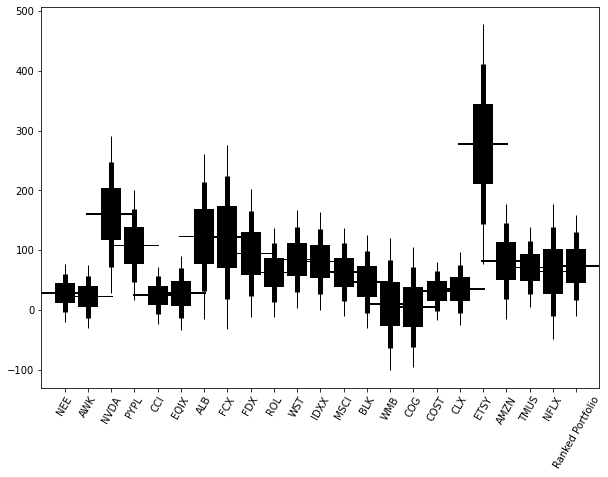

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

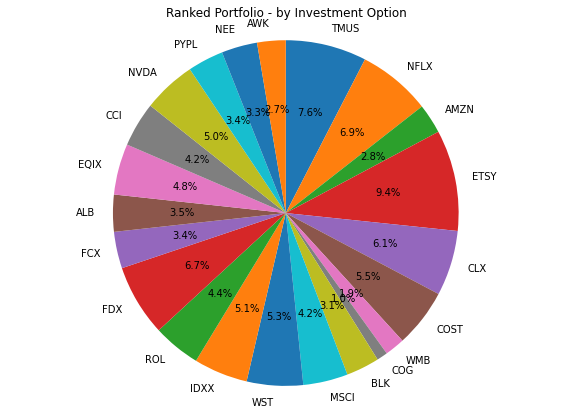

TMUS   0.03
NFLX   0.03
AMZN   0.03
ETSY   0.03
CLX    0.01
COST   0.06
WMB    0.05
COG    0.04
BLK    0.05
MSCI   0.09
WST    0.07
IDXX   0.03
ROL    0.05
FDX    0.04
FCX    0.07
ALB    0.03
EQIX   0.05
CCI    0.03
NVDA   0.04
PYPL   0.08
NEE    0.05
AWK    0.02



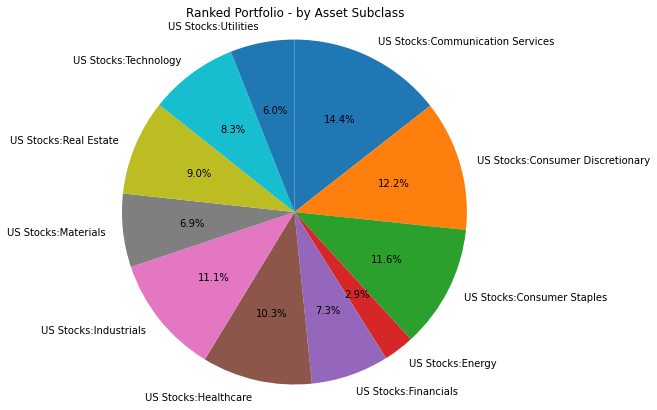

US Stocks:Communication Services   0.14
US Stocks:Consumer Discretionary   0.12
US Stocks:Consumer Staples         0.12
US Stocks:Energy                   0.03
US Stocks:Financials               0.07
US Stocks:Healthcare               0.10
US Stocks:Industrials              0.11
US Stocks:Materials                0.07
US Stocks:Real Estate              0.09
US Stocks:Technology               0.08
US Stocks:Utilities                0.06



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    NEE                            0.0335
    AWK                            0.0266
    NVDA                           0.0497
    PYPL                           0.0335
    CCI                            0.0419
    EQIX                           0.0477
    ALB                            0.0345
    FCX                            0.0343
    FDX                            0.0670
    ROL                            0.0444
    WST                            0.0526
    IDXX                           0.0505
    MSCI                           0.0418
    BLK                            0.0311
    WMB                            0.0186
    COG                            0.0101
    COST                           0.0546
    CLX                            0.0610
    ETSY                           0.0944
    AMZN                           0.0278
    TMUS                           0.0757
    NFLX                           0.0686


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer................

Ranked Portfolio Metrics:          
    max_sharpe_ratio           3.33
    annual_return             99.45
    std_dev                   29.85
    worst typical down year   39.75
    black_swan                 9.89


Ranked Portfolio Weights:
    NEE                            0.0400
    AWK                            0.0700
    NVDA                           0.1400
    PYPL                           0.0500
    CCI                            0.0300
    EQIX                           0.0000
    ALB                            0.0000
    FCX                            0.0000
    FDX                            0.0400
    ROL                            0.0500
    WST                            0.0000
    IDXX                           0.1400
    MSCI                           0.1100
    BLK                            0.0000
    WMB                            0.0000
    COG                            0.0500
    COST                           0.0000
    CLX

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).